# Lets try to find groups of similar customers in the dataset. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [34]:
#Import required libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn import metrics

### 2. Reading the dataset

In [35]:
data = pd.read_csv('CC GENERAL.csv') #Reading the given dataset
print(data.info()) #Get the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [36]:
print(data.describe()) #Describe the dataset

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [37]:
data.head(2) #Print top 2 rows for dataset 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


### 3. Basic pre-processing

In [38]:
data = data.drop('CUST_ID', axis=1) #Dropping unique CustomerID as it does not make sense to use ID for clustering 
data.fillna(method ='ffill', inplace = True) #Address the NA with forward fill i.e. last valid observation 

### Scale the data 

In [39]:
# scaling 
scaler = MinMaxScaler() #Scaling the dataset using given Max-Min option in the assignment
df_scaled=scaler.fit_transform(data) 
df_normalize=normalize(df_scaled) #Normalize the data for further processing 

# Lets solve the same problem using a density based approach. Experiment with the following values of eps and minpts:<br> 
1. eps = 0.1, min_pts = 5
2. eps = 0.5, min_pts = 3
3. eps = 0.8, min_pts = 5 <br>
Analyze the results and comment on how the clustering changes as the above parameters are varied. Report the cluster quality for all the cases using the same measure as used for approach 1. Report results in a tabular format with parameters used, number of noise and core points and cluster quality. 

Cluster with Epsilon as 0.1 and min_pts as 5
Estimated number of clusters: 62
Estimated number of noise points: 5032
Estimated core points: 3310
Silhouette Coefficient: -0.498


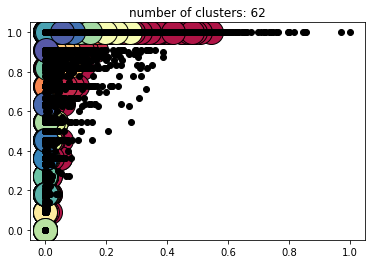

Cluster with Epsilon as 0.3 and min_pts as 3
Estimated number of clusters: 5
Estimated number of noise points: 285
Estimated core points: 8568
Silhouette Coefficient: -0.146


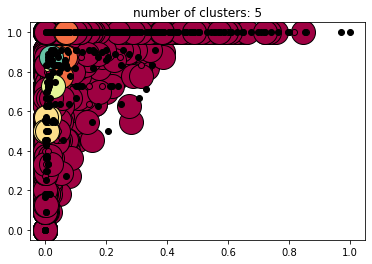

Cluster with Epsilon as 0.8 and min_pts as 5
Estimated number of clusters: 1
Estimated number of noise points: 6
Estimated core points: 8938
Silhouette Coefficient: NA


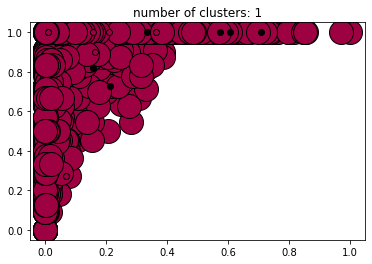

In [47]:
#Defining DBSCAN function to be used for 3 required input data for Epsilon & Minimum points
def Call_DBScan(eps,min_samples,X):
    db = DBSCAN(eps,min_samples).fit(X) #Calling DBSCAN library 
    return db  #return number of samples from DBSCAN 

#Reading the dataset again to keep DBSCAN separate from Aggloremerative clustering. 
#Just run the first section to import required libraries and start from here 
data = pd.read_csv('CC GENERAL.csv') #Read the given dataset
data = data.drop('CUST_ID', axis=1) #Drop unique ID for better clustering 
data.fillna(method ='ffill', inplace = True) #Address NA with forward fill
scaler = MinMaxScaler() #Perform Min-Max scaler
df_scaled=scaler.fit_transform(data) #Apply Max-Min scaler function 
#X=normalize(df_scaled) #Not doing normalization
X=df_scaled #Keep the function without normalization 
sample = 1 #Running same function for 3 options given in the assignment
while(sample < 4):
    if (sample == 1):
        db = Call_DBScan(0.1, 5, X)#Given these values in question
        print ("Cluster with Epsilon as 0.1 and min_pts as 5")
    elif(sample == 2):
        print ("Cluster with Epsilon as 0.3 and min_pts as 3")
        db = Call_DBScan(0.3, 3, X)#Given these values in question
    else:
        print ("Cluster with Epsilon as 0.8 and min_pts as 5")
        db = Call_DBScan(0.8, 5, X)#Given these values in question
    
    labels = db.labels_  #Get the labels from dbscan
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool) #Get the array of type bool as same shape as db.labels
    core_samples_mask[db.core_sample_indices_] = True #Initialize the core points with value true
  
    # Number of clusters in labels, ignoring noise if present. 
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #Get the number of clusters from labels reducing noice part
    n_noise_ = list(labels).count(-1) #labels with -1 from dbscan would be marked as noise
    n_core_ = len(db.core_sample_indices_) #Get the number of core points 
      
    
    print('Estimated number of clusters: %d' % n_clusters_) #Print the number of clusters
    print('Estimated number of noise points: %d' % n_noise_) #Print the number of noise points
    print('Estimated core points: %d' % n_core_) #Print the number of core points
    if ( n_clusters_ > 1): #silhouette_score needs minimum 2 clusters else it will give an error 
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_normalize, labels))
    else:
        print ("Silhouette Coefficient: NA") #Silhoutte score would be NA if number of clusters is not more than 1.

    # Plot result from DBSCAN output
     # Black removed and is used for noise instead. 
    unique_labels = set(labels) #Get the unique set of labels 
    colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))] #Initilize list of colors based on number of unique labels
    for k, col in zip(unique_labels, colors): #Loop thru are labels 
        if k == -1: 
            # Black used for noiss for k=-1
            col = [0, 0, 0, 1] #Setting the black color 
        class_member_mask = (labels == k) 
  
        xy = X[class_member_mask & core_samples_mask] #Get the points to plot 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
                                      markeredgecolor='k',  
                                      markersize=24) #Plot core samples with large size
  
        xy = X[class_member_mask & ~core_samples_mask] 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
                                      markeredgecolor='k', 
                                      markersize=6) #Plot non core samples with small size
  
    plt.title('number of clusters: %d' %n_clusters_) #Print number of clusters as title
    plt.show() #Show the plot
    sample = sample + 1 #Increment for second DBSCAN run for different parameters. 
    

# With Normalized Data : DBSCAN

Cluster with Epsilon as 0.1 and min_pts as 5
Estimated number of clusters: 22
Estimated number of noise points: 1839
Estimated core points: 6415
Silhouette Coefficient: -0.392


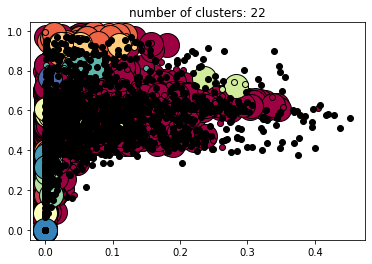

Cluster with Epsilon as 0.3 and min_pts as 3
Estimated number of clusters: 1
Estimated number of noise points: 25
Estimated core points: 8910
Silhouette Coefficient: NA


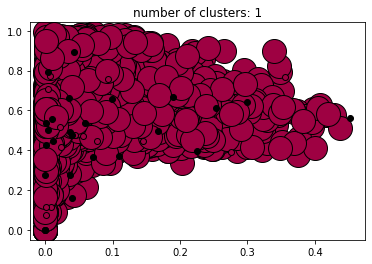

Cluster with Epsilon as 0.8 and min_pts as 5
Estimated number of clusters: 1
Estimated number of noise points: 0
Estimated core points: 8950
Silhouette Coefficient: NA


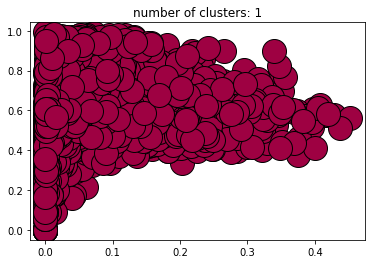

In [48]:
#Defining DBSCAN function to be used for 3 required input data for Epsilon & Minimum points
def Call_DBScan(eps,min_samples,X):
    db = DBSCAN(eps,min_samples).fit(X) #Calling DBSCAN library 
    return db  #return number of samples from DBSCAN 

#Reading the dataset again to keep DBSCAN separate from Aggloremerative clustering. 
#Just run the first section to import required libraries and start from here 
data = pd.read_csv('CC GENERAL.csv') #Read the given dataset
data = data.drop('CUST_ID', axis=1) #Drop unique ID for better clustering 
data.fillna(method ='ffill', inplace = True) #Address NA with forward fill
scaler = MinMaxScaler() #Perform Min-Max scaler
df_scaled=scaler.fit_transform(data) #Apply Max-Min scaler function 
X=normalize(df_scaled) #doing normalization
sample = 1 #Running same function for 3 options given in the assignment
while(sample < 4):
    if (sample == 1):
        db = Call_DBScan(0.1, 5, X)#Given these values in question
        print ("Cluster with Epsilon as 0.1 and min_pts as 5")
    elif(sample == 2):
        print ("Cluster with Epsilon as 0.3 and min_pts as 3")
        db = Call_DBScan(0.3, 3, X)#Given these values in question
    else:
        print ("Cluster with Epsilon as 0.8 and min_pts as 5")
        db = Call_DBScan(0.8, 5, X)#Given these values in question
    
    labels = db.labels_  #Get the labels from dbscan
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool) #Get the array of type bool as same shape as db.labels
    core_samples_mask[db.core_sample_indices_] = True #Initialize the core points with value true
  
    # Number of clusters in labels, ignoring noise if present. 
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #Get the number of clusters from labels reducing noice part
    n_noise_ = list(labels).count(-1) #labels with -1 from dbscan would be marked as noise
    n_core_ = len(db.core_sample_indices_) #Get the number of core points 
      
    
    print('Estimated number of clusters: %d' % n_clusters_) #Print the number of clusters
    print('Estimated number of noise points: %d' % n_noise_) #Print the number of noise points
    print('Estimated core points: %d' % n_core_) #Print the number of core points
    if ( n_clusters_ > 1): #silhouette_score needs minimum 2 clusters else it will give an error 
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_normalize, labels))
    else:
        print ("Silhouette Coefficient: NA") #Silhoutte score would be NA if number of clusters is not more than 1.

    # Plot result from DBSCAN output
     # Black removed and is used for noise instead. 
    unique_labels = set(labels) #Get the unique set of labels 
    colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))] #Initilize list of colors based on number of unique labels
    for k, col in zip(unique_labels, colors): #Loop thru are labels 
        if k == -1: 
            # Black used for noiss for k=-1
            col = [0, 0, 0, 1] #Setting the black color 
        class_member_mask = (labels == k) 
  
        xy = X[class_member_mask & core_samples_mask] #Get the points to plot 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
                                      markeredgecolor='k',  
                                      markersize=24) #Plot core samples with large size
  
        xy = X[class_member_mask & ~core_samples_mask] 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
                                      markeredgecolor='k', 
                                      markersize=6) #Plot non core samples with small size
  
    plt.title('number of clusters: %d' %n_clusters_) #Print number of clusters as title
    plt.show() #Show the plot
    sample = sample + 1 #Increment for second DBSCAN run for different parameters. 
    

## 5. Clustering Visualization
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 

# DBSCAN Clustering

Estimated number of clusters: 1
Estimated number of noise points: 0
Estimated core points: 8950
Silhouette Coefficient: NA


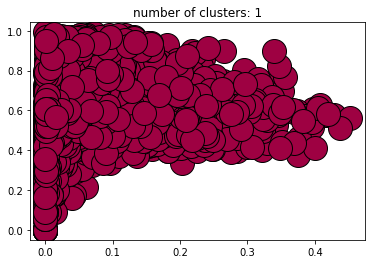

In [103]:
db= DBSCAN(eps=0.8 ,min_samples=5).fit(df_normalize)#Calling DBSCAN library 
labels = db.labels_ #Get the labels from dbscan

core_samples_mask = np.zeros_like(db.labels_, dtype=bool) #Get the array of type bool as same shape as db.labels
core_samples_mask[db.core_sample_indices_] = True #Initialize the core points with value true
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #Get the number of clusters from labels reducing noice part
n_noise_ = list(labels).count(-1) #labels with -1 from dbscan would be marked as noise
n_core_ = len(db.core_sample_indices_) #Get the number of core points       
print('Estimated number of clusters: %d' % n_clusters_)#Print the number of clusters
print('Estimated number of noise points: %d' % n_noise_)#Print the number of noise points
print('Estimated core points: %d' % n_core_) #Print the number of core points
if ( n_clusters_ > 1): #silhouette_score needs minimum 2 clusters else it will give an error 
        print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_normalize, labels))
else:
    print ("Silhouette Coefficient: NA") #Silhoutte score would be NA if number of clusters is not more than 1.
        

# Plot result from DBSCAN output
# Black removed and is used for noise instead. 
unique_labels = set(labels) #Get the unique set of labels 
colors = [plt.cm.Spectral(each)
for each in np.linspace(0, 1, len(unique_labels))] #Initilize list of colors based on number of unique labels
for k, col in zip(unique_labels, colors): #Loop thru are labels 
    if k == -1: 
        # Black used for noise for k=-1. 
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k) 
    xy = df_normalize[class_member_mask & core_samples_mask] #Get the points to plot
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
                                      markeredgecolor='k',  
                                      markersize=24) #Plot core samples with large size
  
    xy = df_normalize[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
                                      markeredgecolor='k', 
                                      markersize=6) #Plot non core samples with small size
  
plt.title('number of clusters: %d' %n_clusters_) #Print number of clusters as title
plt.show() #Show the plot

In [105]:
#Function to get Centroid for Cluster with DBSCAN
def get_centroid(cluster):
    cluster_ary = np.asarray(cluster)
    centroid = cluster_ary.mean(axis = 0)
    return centroid


db= DBSCAN(eps=0.8 ,min_samples=5).fit(df_normalize) #Calling DBSCAN library
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0) #Getting number of clusters excluding noise points
print ("Number of Clusters: ",n_clusters_) #Print number of clusters
db_clusters = pd.Series([X_principal[db.labels_==n] for n in range(n_clusters_)]) #pandas series,where each element is a cluster of points
db_centroids = db_clusters.map(get_centroid) #Calling function to get centroids 
X, Y = zip(*db_centroids) #unzip the list of centroids 
df_centroids = pd.DataFrame({'X':X, 'Y':Y}) #Get the centroids into a dataframe
print("DBSCAN Cluster Centroids")
print (df_centroids) #Print the Centroids

Number of Clusters:  1
DBSCAN Cluster Centroids
              X             Y
0  1.111463e-17 -4.564939e-17
